In [1]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [2]:
## Load the dataset
df=pd.read_csv("data_app.csv")
df

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377
...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,0,5,1420
3996,997,0,Female,51,0,1,54,0,15,4395
3997,998,0,Female,39,1,2,58,0,18,5166
3998,999,0,Male,23,1,4,57,0,18,4896


In [3]:
## Check the datatypes and missing values
## Hint - You can evaluate both using a single method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


##### Record your observations

In [ ]:
### Convert the columns which are of incorrect datatypes (if any) to the correct datatype
#There are no missing or incorrect values.

#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [4]:
### Before starting with Univariate Analysis, make sure to filter the dataframe to only include one period, either Post = 0 or Post = 1
### This way there won't be any repetitions in demographics data for the same customer

### WRITE CODE FOR FILTERING THE DATAFRAME
filtered_df = df[df['Post'] == 0][['Gender', 'Age', 'Nationality', 'Loyalty', 'Tenure']]

# Confirm the filtering
print(filtered_df)

# Summary Statistics
summary_gender = filtered_df['Gender'].value_counts()
summary_age = filtered_df['Age'].describe()
summary_nationality = filtered_df['Nationality'].value_counts()
summary_loyalty = filtered_df['Loyalty'].value_counts()
summary_tenure = filtered_df['Tenure'].describe()


      Gender  Age  Nationality  Loyalty  Tenure
1000    Male   34            1        2      57
1001  Female   36            1        2       5
1002  Female   43            1        1      12
1003    Male   47            1        1      70
1004    Male   41            1        2      13
...      ...  ...          ...      ...     ...
3995    Male   25            1        1      16
3996  Female   51            0        1      54
3997  Female   39            1        2      58
3998    Male   23            1        4      57
3999    Male   45            1        1       3

[2000 rows x 5 columns]


In [ ]:
### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

In [ ]:
### Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics
### Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype


Text(0.5, 1.0, 'Gender Distribution')

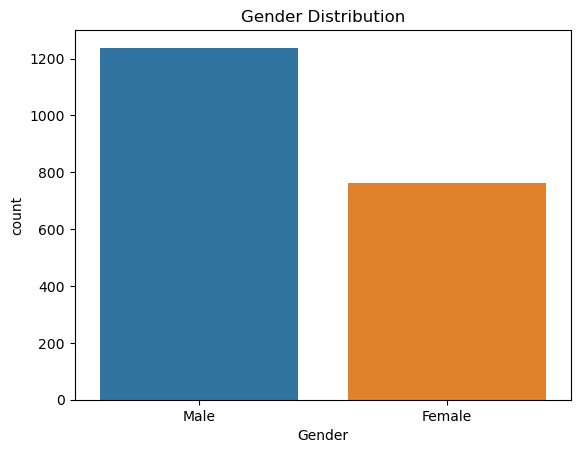

In [5]:
### WRITE CODE FOR ANALYSING "GENDER" VARIABLE
sns.countplot(x='Gender', data=filtered_df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Nationality Distribution')

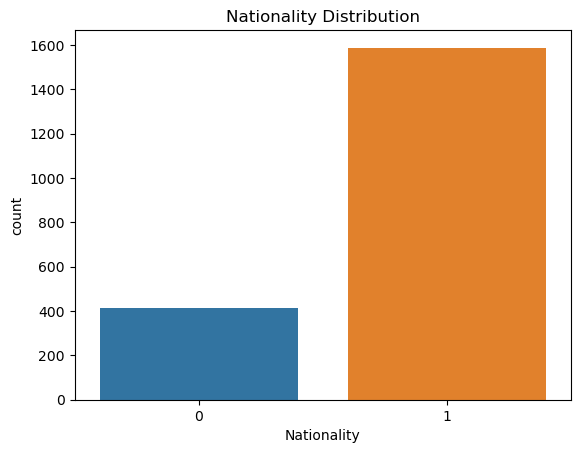

In [6]:
### WRITE CODE FOR ANALYSING "NATIONALITY" VARIABLE
sns.countplot(x='Nationality', data=filtered_df)
plt.title('Nationality Distribution')


Text(0.5, 1.0, 'Loyalty Membership Distribution')

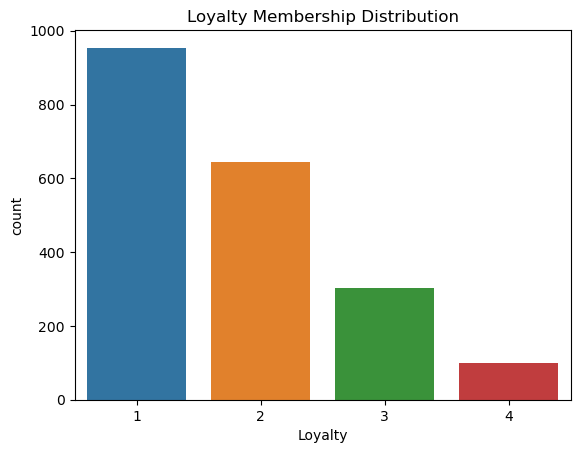

In [7]:
### WRITE CODE FOR ANALYSING "LOYALTY"
sns.countplot(x='Loyalty', data=filtered_df)
plt.title('Loyalty Membership Distribution')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age')

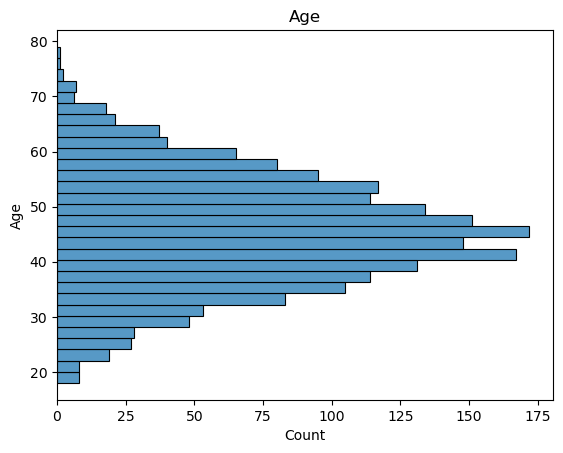

In [8]:
### WRITE CODE FOR ANALYSING "AGE"
sns.histplot(y='Age', data=filtered_df)
plt.title('Age')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Tenure Distribution')

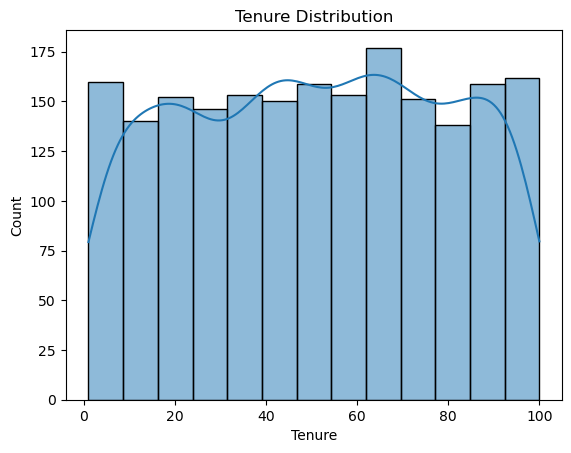

In [9]:
### WRITE CODE FOR ANALYSING "TENURE"
sns.histplot(filtered_df['Tenure'], kde=True)
plt.title('Tenure Distribution')


#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [ ]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases


In [10]:
### WRITE CODE FOR ANALYSING "SPENDING"
df_post_0 = df[df['Post'] == 0][['CustomerID', 'Spending']]
df_post_1 = df[df['Post'] == 1][['CustomerID', 'Spending']]

summary_spending_post_0 = df_post_0['Spending'].describe()
summary_spending_post_1 = df_post_1['Spending'].describe()

print("Summary Statistics for Spending (Post = 0):")
print(summary_spending_post_0)
print("\nSummary Statistics for Spending (Post = 1):")
print(summary_spending_post_1)



Summary Statistics for Spending (Post = 0):
count    2000.000000
mean     4232.173000
std      1703.973864
min       297.000000
25%      2880.000000
50%      4268.500000
75%      5520.500000
max      9330.000000
Name: Spending, dtype: float64

Summary Statistics for Spending (Post = 1):
count     2000.000000
mean      4862.323500
std       1801.456295
min        896.000000
25%       3443.750000
50%       4822.000000
75%       6196.250000
max      11377.000000
Name: Spending, dtype: float64


In [11]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"
df_post_0 = df[df['Post'] == 0][['CustomerID', 'NumBookings']]
df_post_1 = df[df['Post'] == 1][['CustomerID', 'NumBookings']]

summary_numbookings_post_0 = df_post_0['NumBookings'].describe()
summary_numbookings_post_1 = df_post_1['NumBookings'].describe()

print("Summary Statistics for NumBookings (Post = 0):")
print(summary_numbookings_post_0)
print("\nSummary Statistics for NumBookings (Post = 1):")
print(summary_numbookings_post_1)


Summary Statistics for NumBookings (Post = 0):
count    2000.000000
mean       15.192500
std         6.023669
min         1.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        31.000000
Name: NumBookings, dtype: float64

Summary Statistics for NumBookings (Post = 1):
count    2000.000000
mean       17.300000
std         6.025791
min         4.000000
25%        12.000000
50%        17.000000
75%        22.000000
max        32.000000
Name: NumBookings, dtype: float64


***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

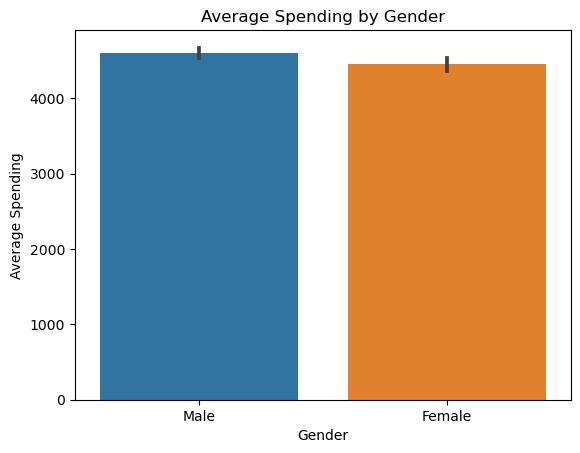

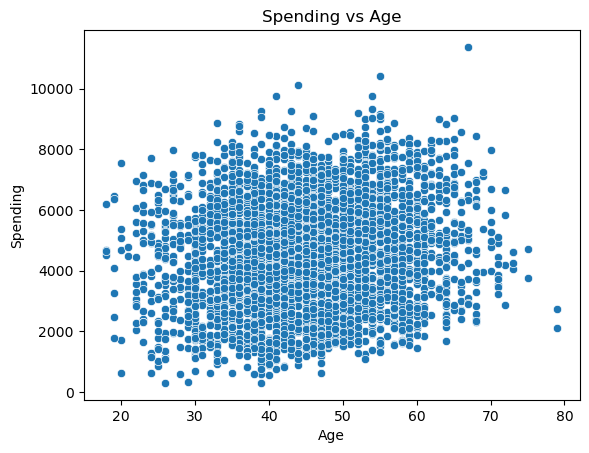

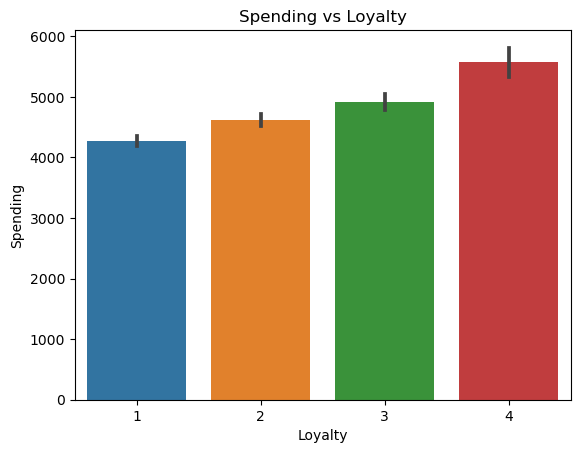

In [12]:
### In this section, you are free to choose the variables you want to analyse and the number of analyses you want to perform.
### For example, you can peform the following analyses.

### Analyze the relationship Spending and Gender.
df_filtered = df[['Gender', 'Spending']]
sns.barplot(x='Gender', y='Spending', data=df_filtered)
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.show()

### Analyze the relationship between Spending and Age.

df_filtered = df[['Age', 'Spending']]
sns.scatterplot(x='Age', y='Spending', data=df_filtered)
plt.title('Spending vs Age')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()


### Analyze the relationship between Spending and Loyalty.
df_filtered = df[['Loyalty', 'Spending']]
sns.barplot(x='Loyalty', y='Spending', data=df_filtered)
plt.title('Spending vs Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Spending')
plt.show()
### .... and so on.

### As suggested before, you are free to choose the variables for analysis.
### Also, you're free to use the necessary tools (either pivot tables or visualizations or both) to perform the analyses
### However, make sure that you analyze the patterns for Spending and Number of Bookings against minimum 3 customer characteristics

- Generate a table of the correlations of all numerical variables of the data set.



In [ ]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.

 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [17]:
### This task may seem intimidating at first.
### However, using the ttest method pingouin package which you learned in the "Designing Business Experiments" module, you should be able to get all the results directly.
!pip install pingouin
import pingouin as pg

pg.ttest(df.Gender,df.Spending)

##Sorry,tried but not able to perform


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [22]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table
pivot_table = pd.pivot_table(df, values='Spending', index='Adopt', columns='Post', aggfunc='mean')
pivot_table

### Report the difference between the spending of treatment and control groups in Post = 1 period.
treatment_spending_post1 = pivot_table.loc[1, 1]
control_spending_post1 = pivot_table.loc[0, 1] 

difference_post1 = treatment_spending_post1 - control_spending_post1
difference_post1

947.9610000000002

  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [26]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.
treatment_spending_post1 = df.loc[(df['Adopt'] == 1) & (df['Post'] == 1), 'Spending']
control_spending_post1 = df.loc[(df['Adopt'] == 0) & (df['Post'] == 1), 'Spending']

ttest_result = pg.ttest(x=treatment_spending_post1, y=control_spending_post1, paired=False)
ttest_result



,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.193523,1998,two-sided,4.868695e-33,"[795.5, 1100.43]",0.545311,4.544e+29,1.0


***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [45]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
post_1_data = df[df['Post'] == 1]
post_0_data = df[df['Post'] == 0]
### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
merged_data = pd.merge(post_1_data, post_0_data, on='CustomerID', suffixes=('x', 'y'))
merged_data
###Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
columns_to_keep = ['CustomerID', 'Spendingx', 'Spendingy']
columns_to_drop = [col for col in merged_data.columns if col not in columns_to_keep]
cleaned_data = merged_data.drop(columns=columns_to_drop)
cleaned_data
### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section
merged_data['Diff'] = merged_data['Spendingx'] - merged_data['Spendingy']
print(merged_data)

      CustomerID  Adoptx Genderx  Agex  Nationalityx  Loyaltyx  Tenurex  \
0           1001       1    Male    34             1         2       57   
1           1002       1  Female    36             1         2        5   
2           1003       1  Female    43             1         1       12   
3           1004       1    Male    47             1         1       70   
4           1005       1    Male    41             1         2       13   
...          ...     ...     ...   ...           ...       ...      ...   
1995         996       0    Male    25             1         1       16   
1996         997       0  Female    51             0         1       54   
1997         998       0  Female    39             1         2       58   
1998         999       0    Male    23             1         4       57   
1999        1000       0    Male    45             1         1        3   

      Postx  NumBookingsx  Spendingx  Adopty Gendery  Agey  Nationalityy  \
0         1            

The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [ ]:
### To understand what why you're doing this, you can use the following image as a reference
### You have already learned this in the second session of the Designing Business Experiments module
### This is how you evaluate the treatment effect( or, Lift) in a Before-After Design

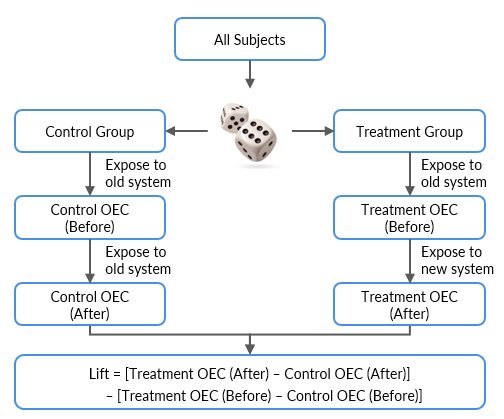

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [67]:
## Once you go through the image, the task is fairly straightforward to do. Here is one of the suggested approaches
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
control_group_post0 = merged_data[(merged_data['Adopty'] == 0) & (merged_data['Posty'] == 0)]

average_spending_control_post0 = control_group_post0['Spendingy'].mean()

print("Average spending for control group in Post = 0 period:", average_spending_control_post0)

## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
treatment_group_post0 = merged_data[(merged_data['Adoptx'] == 1) & (merged_data['Posty'] == 0)]

average_spending_treatment_post0 = treatment_group_post0['Spendingy'].mean()

print("Average spending for treatment group in Post = 0 period:", average_spending_treatment_post0)

## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))
difference0 = average_spending_treatment_post0 - average_spending_control_post0
print("Difference0 (Treatment OEC(Before) - Control OEC (Before)):", difference0)

## After the above, repeat the same steps for Post = 1 period
treatment_group_post1 = merged_data[(merged_data['Adoptx'] == 1) & (merged_data['Postx'] == 1)]
average_spending_treatment_post1 = treatment_group_post1['Spendingx'].mean()

control_group_post1 = merged_data[(merged_data['Adopty'] == 0) & (merged_data['Postx'] == 1)]
average_spending_control_post1 = control_group_post1['Spendingx'].mean()

difference1 = average_spending_treatment_post1 - average_spending_control_post1
print("Difference1 (Treatment OEC(After) - Control OEC (After)):", difference1)

## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
control_group_post1 = merged_data[(merged_data['Adopty'] == 0) & (merged_data['Postx'] == 1)]

average_spending_control_post1 = control_group_post1['Spendingx'].mean()

print("Average spending for control group in Post = 1 period:", average_spending_control_post1)

## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
treatment_group_post1 = merged_data[(merged_data['Adoptx'] == 1) & (merged_data['Postx'] == 1)]

average_spending_treatment_post1 = treatment_group_post1['Spendingx'].mean()

print("Average spending for treatment group in Post = 1 period:", average_spending_treatment_post1)
## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))
difference1 = average_spending_treatment_post1 - average_spending_control_post1

print("Difference1 (Treatment OEC(After) - Control OEC (After)):", difference1)
### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect
treatment_effect = (difference1 - difference0)
print("Treatment Effect in Before-After design:", treatment_effect)

Average spending for control group in Post = 0 period: 4188.753
Average spending for treatment group in Post = 0 period: 4275.593
Difference0 (Treatment OEC(Before) - Control OEC (Before)): 86.84000000000015
Difference1 (Treatment OEC(After) - Control OEC (After)): 947.9610000000002
Average spending for control group in Post = 1 period: 4388.343
Average spending for treatment group in Post = 1 period: 5336.304
Difference1 (Treatment OEC(After) - Control OEC (After)): 947.9610000000002
Treatment Effect in Before-After design: 861.1210000000001


- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [ ]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.
##Not able to perform

Executive Summary- 


1)In this particular dataset we performed different types of analysis such as  Statistical Analysis,Multivariate Analysis,Exploratory Data Analysis,etc 
2)First we cleaned and filtered the data whether to see if there are any null values present in the dataset.
3)During the exploratory data analysis we worked out with two columns,"Spending" & "Numbookings".
4)In Multivariate Analysis we plotted different types of plots such as Histogram,Scatterplot,Pivot Tables,etc for the respected columns given.
5)In statistical analysis we performed Before-After design which consists of aspects like control and treatment.We were able to find average spending for control & treatment groups in post 0 and post 1.Then we also found differences of each posts and then the total difference by subtracting the previously calculated differences.
